<a href="https://colab.research.google.com/github/Abdulhay04/my_qwasar_code.py/blob/main/Classically_Punk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""import libraries"""
from scipy.io import wavfile
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as display

# Scitik-learn implements machine learning, pre-processing, cross-validation and visualization algorithms.
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, estimate_bandwidth
from sklearn.tree import DecisionTreeClassifier

***Label encoder and Standard scalar libraries manual ***


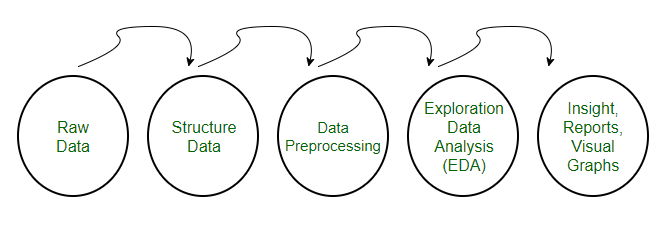

# Classes
Classes provide a means of bundling data and functionality together. Creating a new class creates a new type of object, allowing new instances of that type to be made. Each class instance can have attributes attached to it for maintaining its state. Class instances can also have methods (defined by its class) for modifying its state.

Compared with other programming languages, Python’s class mechanism adds classes with a minimum of new syntax and semantics. It is a mixture of the class mechanisms found in C++ and Modula-3. Python classes provide all the standard features of Object Oriented Programming: the class inheritance mechanism allows multiple base classes, a derived class can override any methods of its base class or classes, and a method can call the method of a base class with the same name. Objects can contain arbitrary amounts and kinds of data. As is true for modules, classes partake of the dynamic nature of Python: they are created at runtime, and can be modified further after creation.

In [29]:
class Classically_punk_part_I:
  def __init__(self,data, music_data):
    if data != None:
      self.data = pd.read_csv(data)
      new_filename_drop_data = self.data.drop(labels = "filename", axis=1)
      self.new_data_for_correlation = new_filename_drop_data[new_filename_drop_data.columns[1:10]]

    data, sr = librosa.load('../Downloads/Data/genres_original/'+music_data)
    self.data = data
    self.sr = sr


  def information_of_dataset(self):   
    print("Dataset dimension:\n")
    print(self.data.shape, "\n\n")  
    print("First 10 rows of dataset\n") 
    print(self.data.head(10), "\n\n")
    print("Information of dataset:\n")
    print(self.data.dtypes, "\n")

  def null_values_on_dataset(self): 
    print("Null values of dataset:\n")
    print(self.data.isnull().sum(), "\n")

  def print_histograms(self):              
    df = self.data.drop(labels = "filename", axis=1)
    df.hist(figsize = (30, 20), color = "indigo")
    plt.show()
  
  def plot_the_categories(self):
    sns.countplot(x=self.data.label) 
    plt.xticks(rotation=90)

  def correlation_matrix(self):          
    correlations = self.new_data_for_correlation.corr()
    corr=correlations.corr()
    plt.subplots(figsize=(15,10))
    sns.heatmap(corr,annot=True)
    plt.show()

  def classically_punk_fit_model_predict(self):  
    def return_models(models,models_name):
      d_models = {}
      for i in range(len(models_name)):
        d_models[models_name[i]] = models[i]()
      return d_models

    # we use these models to process raw resources
    encoder = LabelEncoder()
    scaler = StandardScaler()
    data = self.data.drop(labels='filename',axis=1) 
    get_filename_data_for_predict = data.iloc[:, :-1]
    labels_for_predict = data.iloc[:, -1]
    # x = np.array(data, dtype = float)
    x = scaler.fit_transform(get_filename_data_for_predict)
    y = encoder.fit_transform(labels_for_predict)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 20)
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    XGB=XGBClassifier()
    algos=[KN,D,XGB]
    algo_names=['KNeighborsClassifier','DecisionTreeClassifier','XGBClassifier']
    accuracy_scored=[]
    models = []
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        models.append(round(accuracy_score(y_test,item.predict(x_test))*100))
    color = ["green","yellow", "red"]
    plt.title("Machine learning result from the Classically Punk project")
    plt.barh(algo_names, models, color = color)
    plt.show()
 


class Classically_punk(Classically_punk_part_I):

  def play_audio(self):
    # Audio recording
    return display.Audio(self.data, rate=self.sr)

  def audio_shape(self):
    return f'audio data type: {type(self.data)}, sr type: {type(self.sr)}'

  def plot_raw_wave_files(self):
    plt.title("Plot Raw Wave Files", fontsize=30)
    librosa.display.waveplot(self.data,sr=self.sr, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)
    plt.show()

  def raw_audio_example(self):
    pd.Series(self.data).plot(figsize=(13,3),
                              lw=1, 
                              title="Raw Audio Example", 
                              color='blue')
    plt.show()
    pd.Series(self.data[30000:35000]).plot(figsize=(13,3),
                              lw=1, 
                              title="Raw Audio Zoomed in Example", 
                              color='blue')
    plt.show()

  def audio_spectogram(self):
    d = librosa.stft(self.data)
    s_db = librosa.amplitude_to_db(np.abs(d), ref=np.max)
    plt.figure(figsize=(10, 5))
    img = librosa.display.specshow(s_db, 
                                   x_axis = 'time', 
                                   y_axis='log',)
    plt.title("Spectogram Example", fontsize=25)
    plt.colorbar(img, format=f'%0.2f')
    plt.show()

  def mel_spectogram_example(self):
    S = librosa.feature.melspectrogram(self.data, sr=self.sr, n_mels=128*2)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    fig, ax = plt.subplots(figsize=(10,5))
    img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
    ax.set_title('Mel Spectogram Example', fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')
    

punk_data = Classically_punk(data = "../Downloads/Data/features_3_sec.csv", music_data = "jazz/jazz.00087.wav")




In [ ]:
punk_data.information_of_dataset()

Dataset dimension:

(9990, 60) 


First 10 rows of dataset

            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
5  blues.00000.5.wav   66149          0.376670         0.089702  0.132618   
6  blues.00000.6.wav   66149          0.379909         0.088827  0.130335   
7  blues.00000.7.wav   66149          0.331880         0.092119  0.140600   
8  blues.00000.8.wav   66149          0.347877         0.094209  0.133130   
9  blues.00000.9.wav   66149          0.358061         0.082957  0.115312   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.0

In [ ]:
punk_data.null_values_on_dataset()

Null values of dataset:

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean        

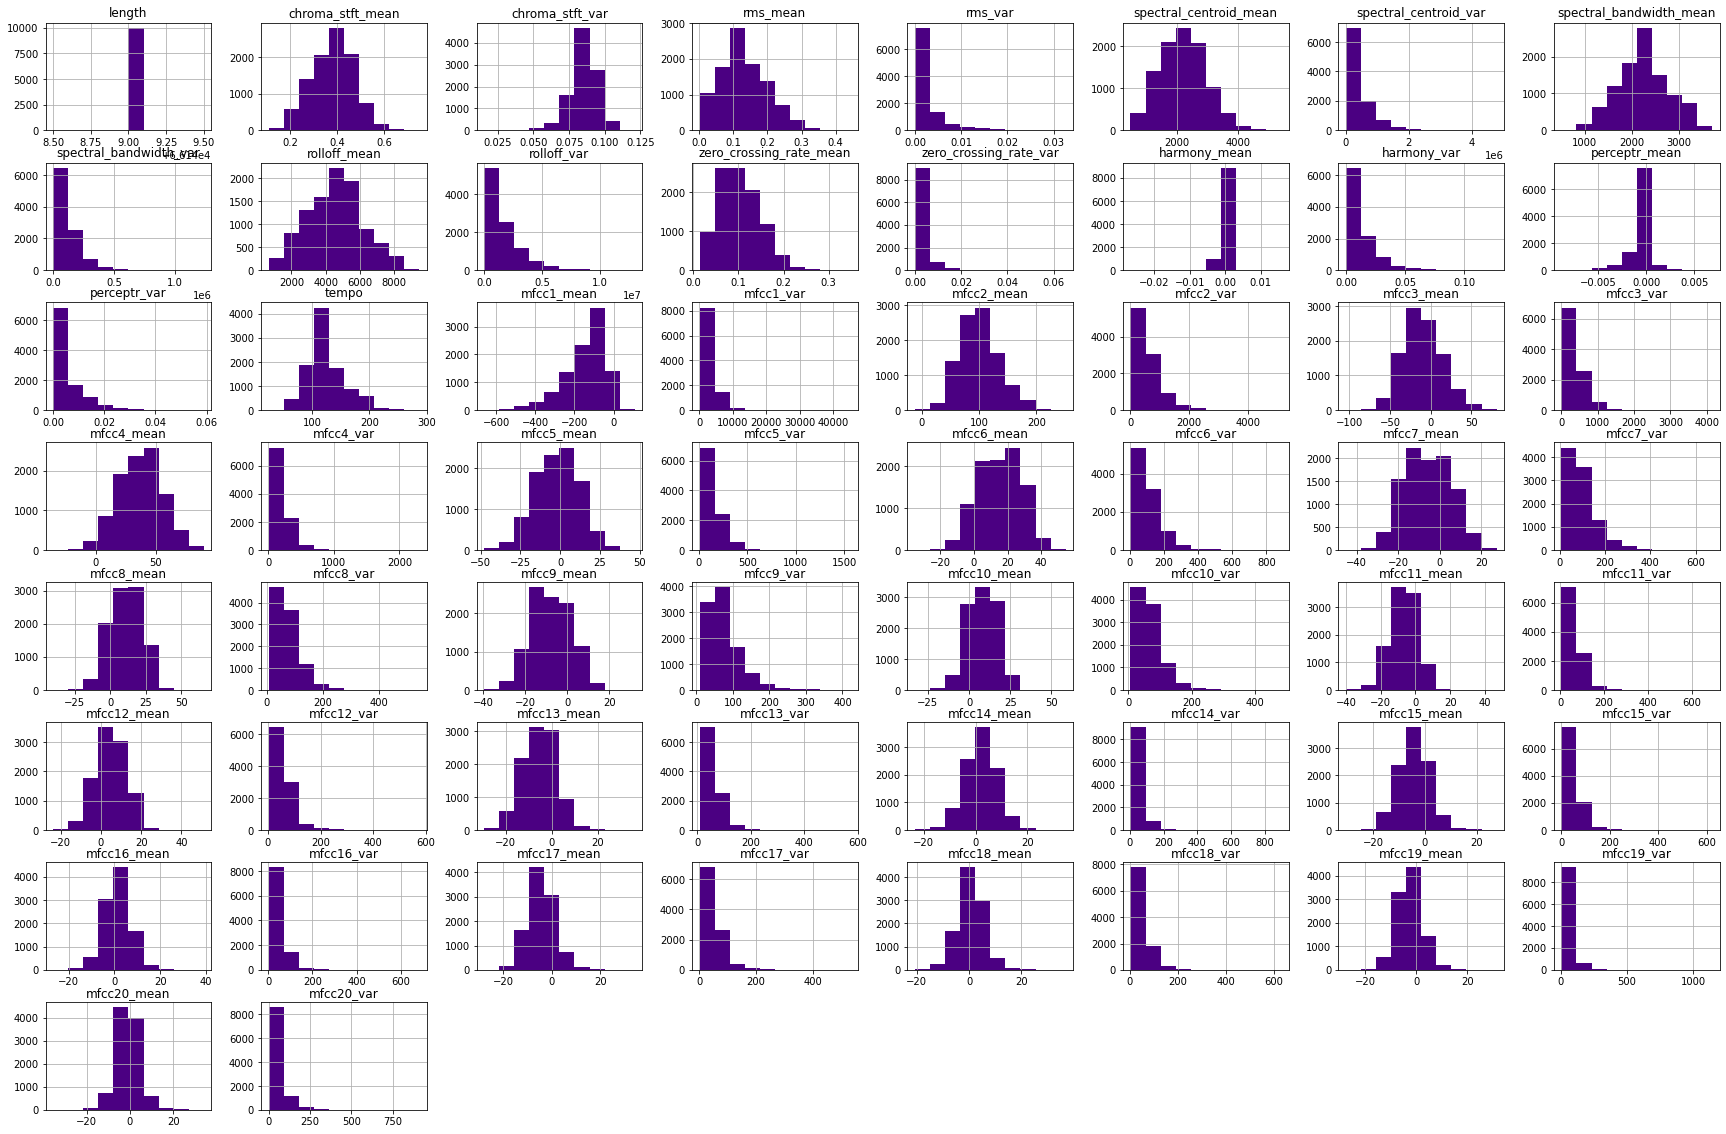

In [ ]:
punk_data.print_histograms()

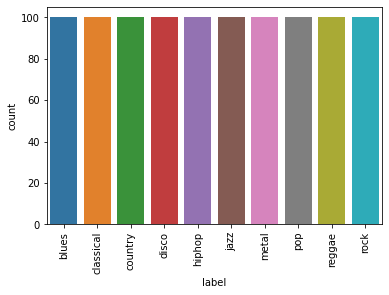

In [ ]:
punk_data.plot_the_categories()

In [18]:
punk_data.play_audio()

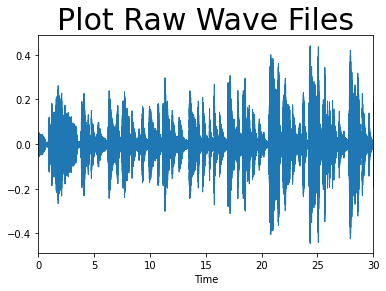

In [19]:
punk_data.plot_raw_wave_files()

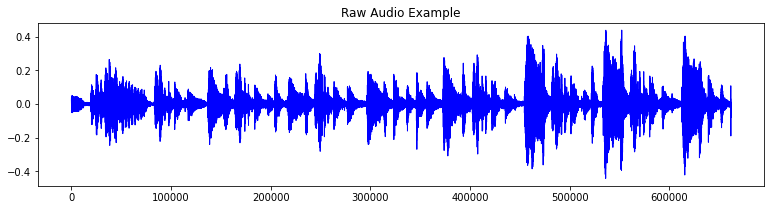

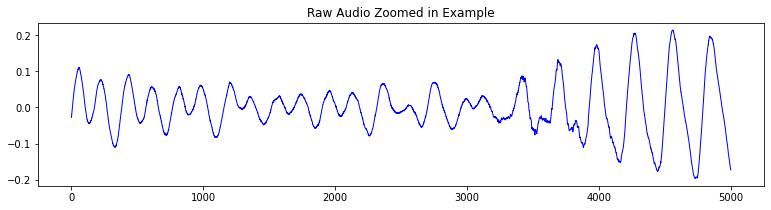

In [20]:
punk_data.raw_audio_example()

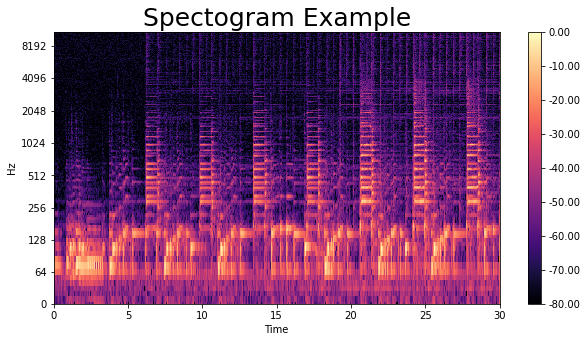

In [30]:
punk_data.audio_spectogram()

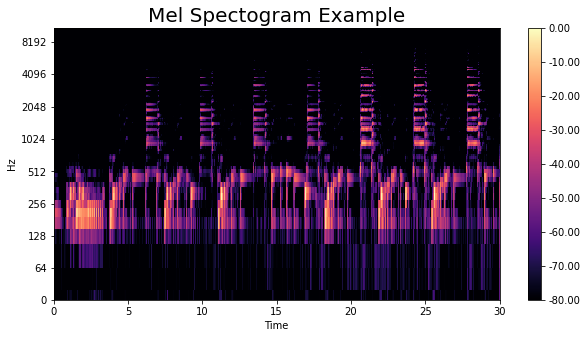

In [28]:
punk_data.mel_spectogram_example()

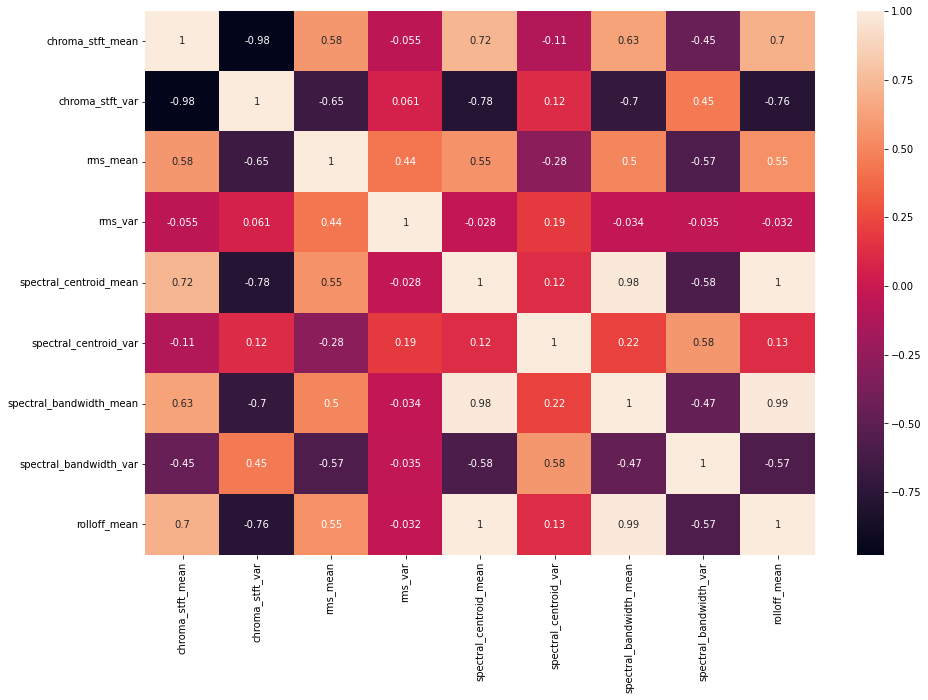

In [ ]:
punk_data.correlation_matrix()

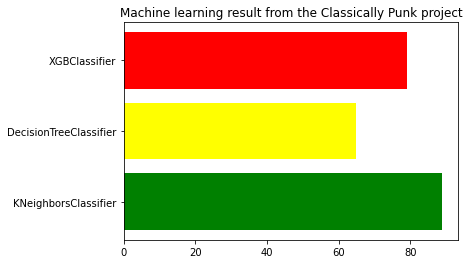

In [ ]:
punk_data.classically_punk_fit_model_predict()